In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statistics

In [2]:
df = pd.read_csv('data/steam_reviews.csv')

Here the dataframe is split up in lists of certain selected games

In [3]:
list = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
list8 = []
list9 = []
for x in range(len(df.index)):
    if df.iloc[x,7] != 'Dead by Daylight':
        list.append(x)
    if df.iloc[x,7] != 'Expansion - Hearts of Iron IV: Man the Guns':
        list2.append(x)
    if df.iloc[x,7] != 'Warhammer 40,000: Mechanicus':
        list3.append(x)
    if df.iloc[x,7] != "PLAYERUNKNOWN'S BATTLEGROUNDS":
        list4.append(x)
    if df.iloc[x,7] != 'Grand Theft Auto V':
        list5.append(x)
    if df.iloc[x,7] != 'Rust':
        list6.append(x)
    if df.iloc[x,7] != 'Rocket League®':
        list7.append(x)
    if df.iloc[x,7] != "Tom Clancy's Rainbow Six® Siege":
        list8.append(x)
    if df.iloc[x,7] != "The Elder Scrolls V: Skyrim Special Edition":
        list9.append(x)
        

g1 = df.drop(list)
g2 = df.drop(list2)
g3 = df.drop(list3)
g4 = df.drop(list4)
g5 = df.drop(list5)
g6 = df.drop(list6)
g7 = df.drop(list7)
g8 = df.drop(list8)
g9 = df.drop(list9)

Splitting up the recommendations into positive and negative and saving only the date of reviewal.

In [4]:
goodG1 = []
badG1 = []

for x in range(len(g1.index)):
    if g1.iloc[x,5] == "Not Recommended":
        badG1.append(g1.iloc[x,0])
    else:
        goodG1.append(g1.iloc[x,0])

goodG8 = []
badG8 = []

for x in range(len(g8.index)):
    if g8.iloc[x,5] == "Not Recommended":
        badG8.append(g8.iloc[x,0])
    else:
        goodG8.append(g8.iloc[x,0])

Another list gets created that contains all possible review dates (months).

In [5]:
finalG1 = []
for x in range(len(g1)):
    if(g1.iloc[x,0][:7] not in finalG1):
        finalG1.append(g1.iloc[x,0][:7])
        
finalG1 = sorted(finalG1)
#finalG1

finalG8 = []
for x in range(len(g8)):
    if(g8.iloc[x,0][:7] not in finalG8):
        finalG8.append(g8.iloc[x,0][:7])
        
finalG8 = sorted(finalG8)

finalG8

['2016-06',
 '2016-11',
 '2016-12',
 '2017-06',
 '2017-07',
 '2018-01',
 '2018-05',
 '2018-11',
 '2018-12']

Each date (monthly) has a integer connected to it. If there is a positive review on that date +1 and of there is a negative date -1. The last known month is also removed from the dataset, as the reviews in this month are not all fully written yet.

In [6]:
finalG1Count = [0] * len(finalG1)

for x in range(len(goodG1)):
    finalG1Count[finalG1.index(goodG1[x][:7])] += 1
for x in range(len(badG1)):
    finalG1Count[finalG1.index(badG1[x][:7])] -= 1
    
finalG1.pop(32)
finalG1Count.pop(32)

for x in range(len(finalG1)):
    finalG1[x] = finalG1[x][2:7]

#finalG1
    
finalG8Count = [0] * len(finalG8)

for x in range(len(goodG8)):
    finalG8Count[finalG8.index(goodG8[x][:7])] += 1
for x in range(len(badG8)):
    finalG8Count[finalG8.index(badG8[x][:7])] -= 1
    
finalG8.pop(8)
finalG8Count.pop(8)

for x in range(len(finalG8)):
    finalG8[x] = finalG8[x][2:7]

The monthly players data gets added as a dataset. This data is from Steamcharts.com, which is a thirdparty website that utilizes Steam's public data. The data is manually added as a list.

In [7]:
g1Popularity = [18011,23743,42268,24120,29147,29783,42895,31992,23442,20082,17124,20067,22352,23814,27166,38698,36343,31039,26850,33164,33397,23707,22439,36414,36423,46865,36374,62756,51065,40901,38560,41441]
#g1Popularity

g8Popularity = [15295,42265,30859,43057,47328,109103,142362,115820]

As the number of players and the number of reviews is far off from each other, we instead take the relative difference compared to previous month. By having the values in a percentual difference, it is easier to compare them. 

In [8]:
g1ReviewDifference = [0] * len(finalG1)
g1PopDifference = [0] * len(finalG1)

for x in range(1,len(finalG1)):
    g1ReviewDifference[x] = finalG1Count[x-1] / finalG1Count[x]
    g1PopDifference[x] = g1Popularity[x-1] / g1Popularity[x]

g8ReviewDifference = [0] * len(finalG8)
g8PopDifference = [0] * len(finalG8)

for x in range(1,len(finalG8)):
    g8ReviewDifference[x] = finalG8Count[x-1] / finalG8Count[x]
    g8PopDifference[x] = g8Popularity[x-1] / g8Popularity[x]

# Graph analysis

These graphs shows the change in each month of both the recommendations (blue) and the popularity (orange) of the games (Dead by daylight & Rainbow six siege). While the recommendations occasionally peak, the popularity does not increase the month after. Meaning that the reviews do not have a major impact on the game's popularity and therefore also the sales.

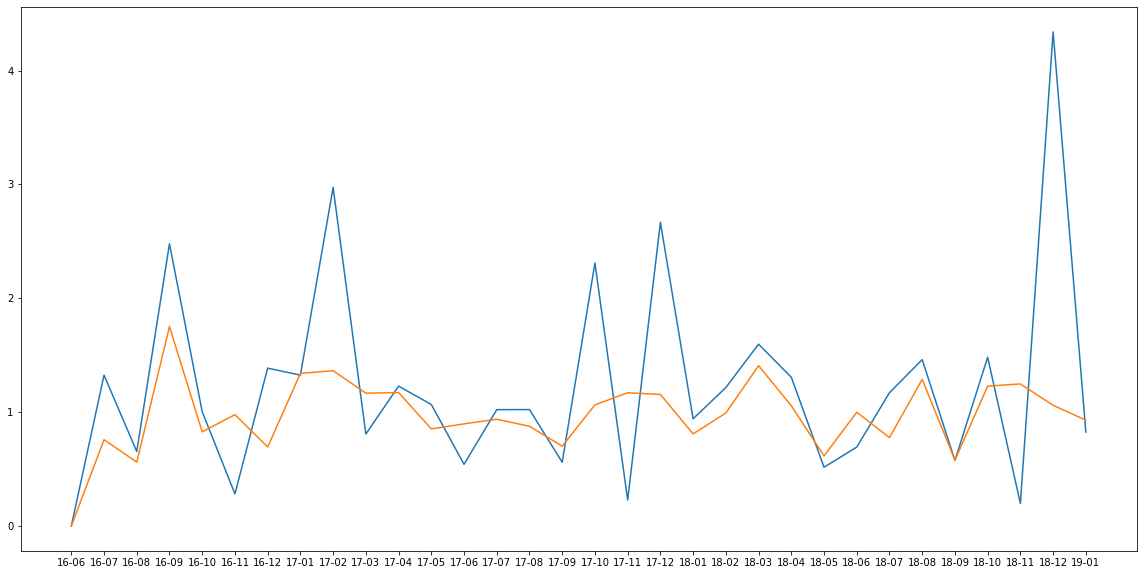

In [9]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(finalG1, g1ReviewDifference, label = "Reviews")
plt.plot(finalG1, g1PopDifference, label = "Popularity")
plt.show()

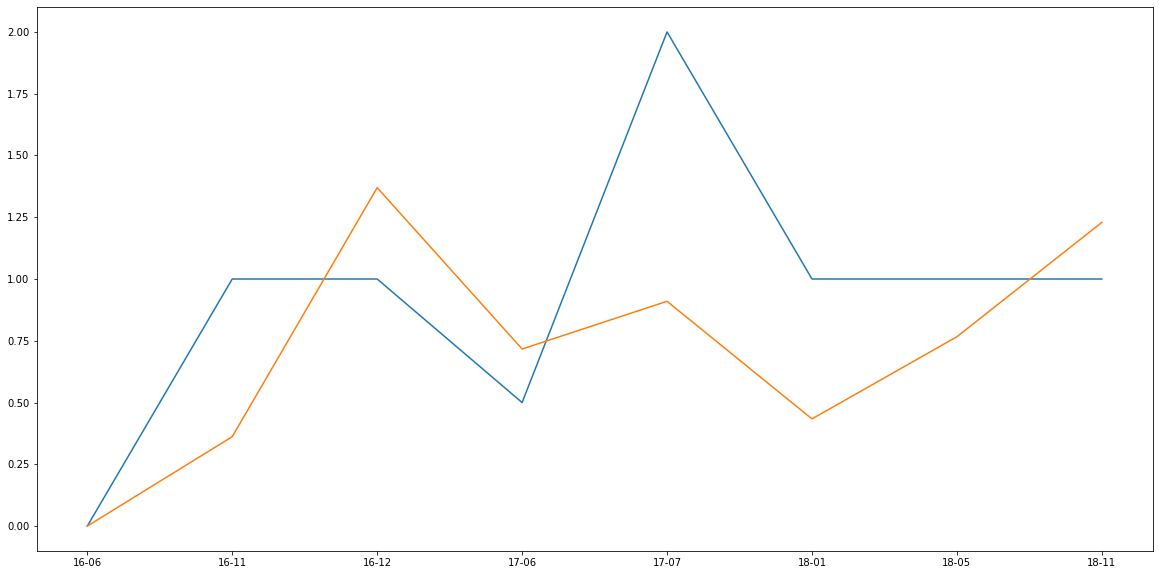

In [10]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(finalG8, g8ReviewDifference, label = "Reviews")
plt.plot(finalG8, g8PopDifference, label = "Popularity")
plt.show()

Here the mean and standard deviation is calculated for additional data.

In [11]:
meanReviews = statistics.mean(g1ReviewDifference)
stdevReviews = statistics.stdev(g1ReviewDifference)

meanPop = statistics.mean(g1PopDifference)
stdevPop = statistics.stdev(g1PopDifference)

print("R mean: " + str(meanReviews))
print("P mean: " + str(meanPop))

print("R standard deviation: " + str(stdevReviews))
print("P standard deviation: " + str(stdevPop))

R mean: 1.2257888117020157
P mean: 0.9773918095009384
R standard deviation: 0.9043395156377356
P standard deviation: 0.32200791039747234
